<a href="https://colab.research.google.com/github/samer-glitch/samerelhajjhassan/blob/main/Preliminiary%20Observations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving psp_fees.csv to psp_fees.csv


In [2]:
from google.colab import files
uploaded = files.upload()

Saving PSP_Jan_Feb_2019.csv to PSP_Jan_Feb_2019.csv


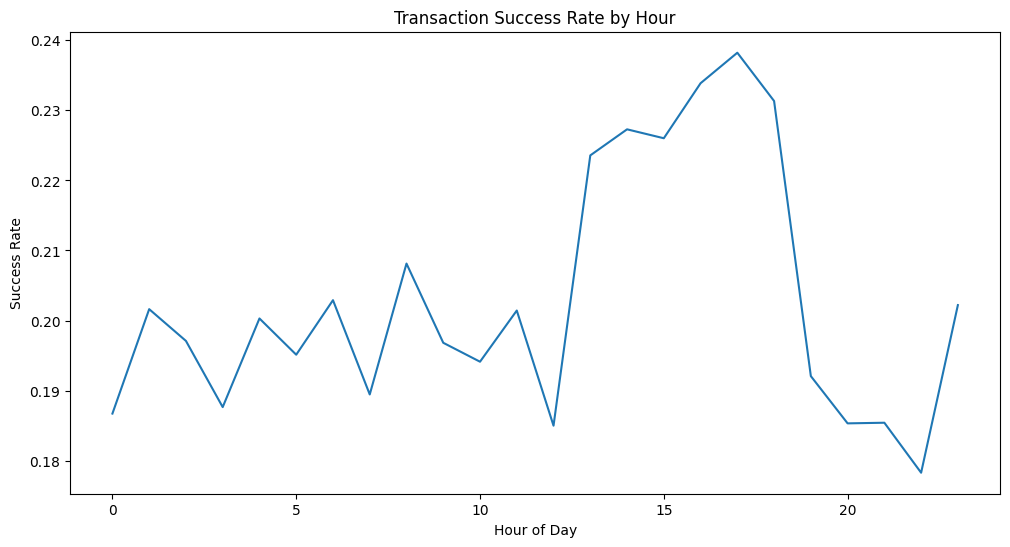

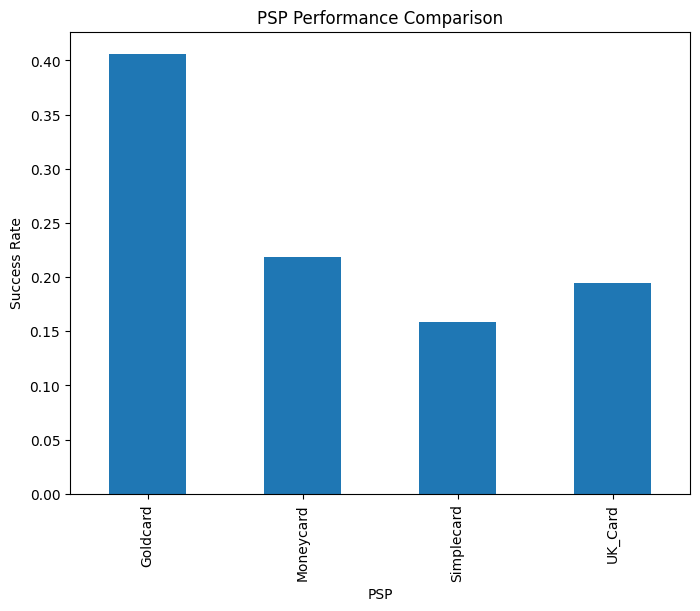

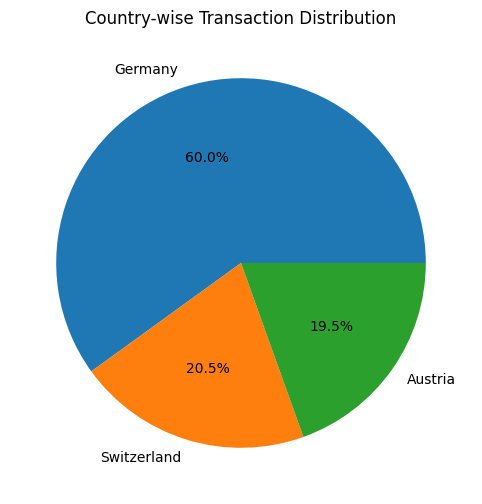

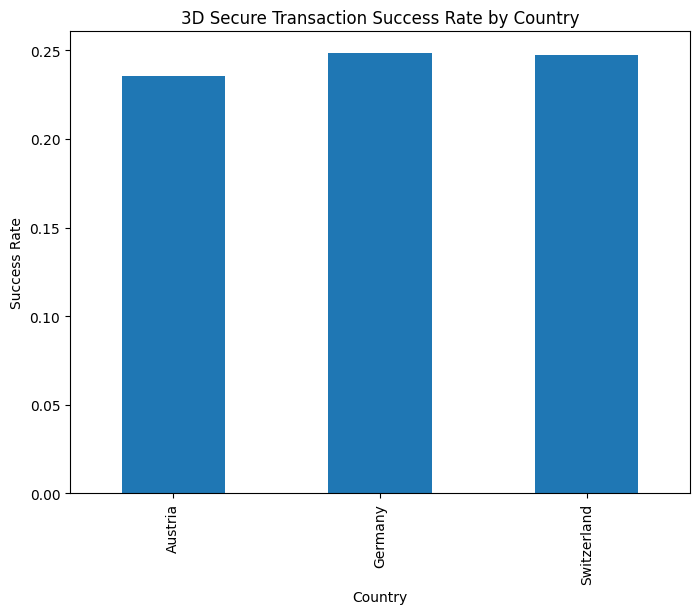

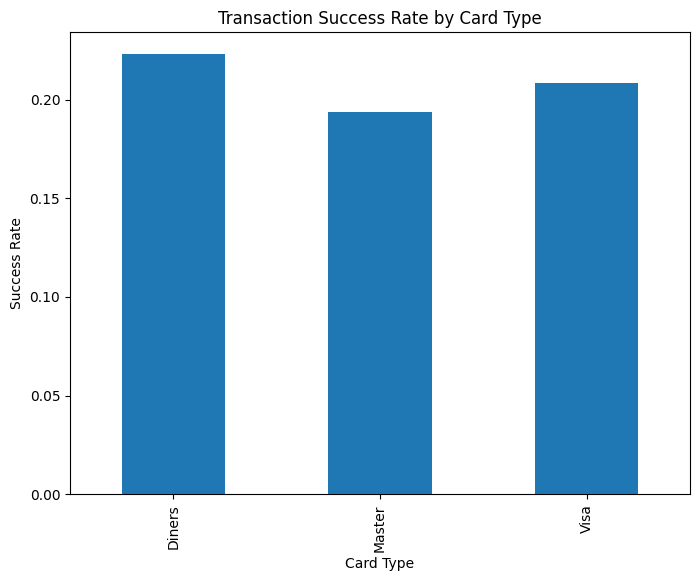

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load the datasets
psp_fees_df = pd.read_csv('psp_fees.csv')
transactions_df = pd.read_csv('PSP_Jan_Feb_2019.csv')

# Convert 'tmsp' to datetime and extract hour and day
transactions_df['tmsp'] = pd.to_datetime(transactions_df['tmsp'])
transactions_df['hour'] = transactions_df['tmsp'].dt.hour
transactions_df['day'] = transactions_df['tmsp'].dt.date

# Prepare data for visualization

# 1. Transaction Success Rate by Hour/Day
hourly_success_rate = transactions_df.groupby('hour')['success'].mean()

# 2. PSP Performance Comparison
psp_success_rate = transactions_df.groupby('PSP')['success'].mean()

# 3. Country-wise Transaction Analysis
country_counts = transactions_df['country'].value_counts()

# 4. Most Secure 3D Country
secure_3d_country_success_rate = transactions_df[transactions_df['3D_secured'] == 1].groupby('country')['success'].mean()

# 5. Card Type and Transaction Success
card_success_rate = transactions_df.groupby('card')['success'].mean()

# Generate Visualizations
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_success_rate)
plt.title('Transaction Success Rate by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Success Rate')
plt.show()

plt.figure(figsize=(8, 6))
psp_success_rate.plot(kind='bar')
plt.title('PSP Performance Comparison')
plt.xlabel('PSP')
plt.ylabel('Success Rate')
plt.show()

plt.figure(figsize=(8, 6))
country_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Country-wise Transaction Distribution')
plt.ylabel('')
plt.show()

plt.figure(figsize=(8, 6))
secure_3d_country_success_rate.plot(kind='bar')
plt.title('3D Secure Transaction Success Rate by Country')
plt.xlabel('Country')
plt.ylabel('Success Rate')
plt.show()

plt.figure(figsize=(8, 6))
card_success_rate.plot(kind='bar')
plt.title('Transaction Success Rate by Card Type')
plt.xlabel('Card Type')
plt.ylabel('Success Rate')
plt.show()
